In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

# Plot N(R)

In [128]:
f = fits.open('output/tests/BigMD_box_nor_fixR_spherical.fits')#_vsf.fits')
f[1].header
f[1].data['R'].transpose()

array([[48.5, 43.3, 43.3, ..., 15.3, 15.3, 15.3]], dtype=float32)

In [121]:
def vsf(fn):
    f = fits.open(fn)
    rmean = f[1].data['rmean'].transpose()[0]
    dn = f[1].data['dn/dlnR'].transpose()[0]
    err = f[1].data['err'].transpose()[0]
    f.close()
    
    # remove bins with no voids
    mask = np.where(dn != 0)[0]

    return rmean[mask], dn[mask], err[mask]

def plot_vsf(fns, residual=False, save_fn=None, **kwargs):
    
    # add a residual plot
    fig = plt.figure(1)
    ax=fig.add_axes((.1,.3,.8,.6))
    if residual==True: ax1=fig.add_axes((.1,.1,.8,.2), sharex=ax)
    
    for (i,fn) in enumerate(fns):
        plot_kwargs = dict()
        for n in kwargs.keys():
            plot_kwargs[n] = kwargs[n][i]
        ax.errorbar(*vsf(fn), capsize=2, **plot_kwargs)
        
        if residual==True:
            if i==0: continue

            # cutsky
            R_cut, N_cut, err_cut = vsf(fns[i])

            # box
            R, N_box, err_box = vsf(fns[0])[-R_cut.size:]
            # cut to cutsky range
            R_box = R[-R_cut.size:]
            N_box = N_box[-R_cut.size:]
            err_box = err_box[-R_cut.size:]

            err_comb = np.sqrt((err_cut/N_cut)**2 
                             + (err_box/N_box)**2)

            ax1.errorbar(R_cut, N_cut/N_box - 1, err_comb, capsize=2, **plot_kwargs)
            ax1.hlines(0, R_cut[-1], R[0], kwargs['c'][0], '--')
            ax1.set_xlabel('r ($h^{-1}$ Mpc)', fontsize=14)
            ax1.set_ylabel('Frac. dev.', fontsize=14)
#             ax1.set_xscale('log')
            ax1.grid(which='major', axis='both')
        else:
            ax.set_xlabel('r ($h^{-1}$ Mpc)', fontsize=14)
            
    ax.set_ylabel('dn/dlnR ($h^{-1}$ Mpc)$^{-3}$', fontsize=14)
#     ax.set_ylim((1e-10,1e-4))
    ax.set_yscale('log')
    ax.grid(which='major',axis='both')
    ax.legend()
    if save_fn != None: plt.savefig(save_fn)
    

## Effect of randoms

[5.4871191e-10 3.5690655e-09 1.0360888e-08 2.0162165e-08 3.2653972e-08
 4.6967326e-08 5.9251345e-08 7.3399761e-08 8.3937820e-08 1.0168577e-07
 1.1969460e-07]
[0.0000000e+00 0.0000000e+00 1.8344037e-09 7.1505362e-09 1.7474470e-08
 3.4217010e-08 5.2521845e-08 7.1077054e-08 8.8324917e-08 1.0739982e-07
 1.2660293e-07]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7444843e-09 6.3077450e-09
 1.7245508e-08 3.6513999e-08 5.8971636e-08 8.2903114e-08 1.0693276e-07
 1.2828735e-07]


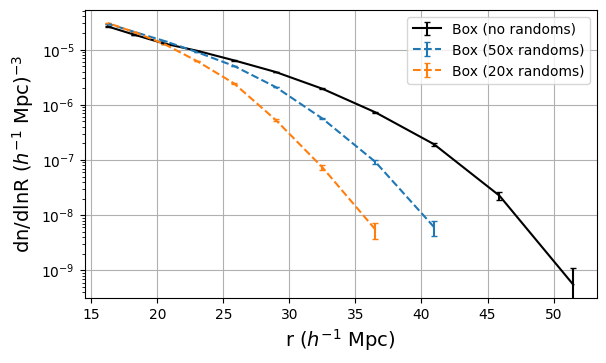

In [150]:
fns = ['output/tests/BigMD_box_nor_fixR_spherical_vsf.fits',
#        'output/tests/BigMD_box_50r_fixR_spherical_vsf.fits',
       'output/tests/BigMD_box_20r_fixR_spherical_vsf.fits',
       'output/tests/BigMD_box_10r_fixR_spherical_vsf.fits']

kwargs = dict(c=['k','C0','C1','C2'], 
              ls=['-','--','--','--'],
              label=['Box (no randoms)', 
                     'Box (50x randoms)', 
                     'Box (20x randoms)', 
                     'Box (10x randoms)'])
plot_vsf(fns, **kwargs)

## Effect of cutsky geometry

In [152]:
fns = ['output/tests/BigMD_box_50r_fixR_spherical_vsf.fits',
       'output/tests/BigMD_cut_50r_fixR_spherical_vsf.fits']

kwargs = dict(c=['k','C0'], 
              ls=['-','-'],
              label=['Box (50x randoms)', 'Cutsky (50x randoms)'])
plot_vsf(fns, residual=True, **kwargs)

SyntaxError: '[' was never closed (3809425261.py, line 1)

## Effect on cross-correlation function

In [147]:
def ccf(fn):
    f = fits.open(fn)
    s = f[1].data['s']
    xi_0 = f[1].data['xi_0']
    xi_2 = f[1].data['xi_2']
    
    return s, xi_0, xi_2

def plot_ccf(fn, save_fn=None):
    
    s, xi_0, xi_2 = ccf(fn)
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
    ax1.plot(s, xi_0)
    ax2.plot(s, xi_2)
    ax1.set_xlabel('r ($h^{-1}$ Mpc)', fontsize=14)
    ax2.set_xlabel('r ($h^{-1}$ Mpc)', fontsize=14)
    ax1.set_ylabel(r'$\xi_0(r)$', fontsize=14)
    ax2.set_ylabel(r'$\xi_2(r)$', fontsize=14)
    ax1.hlines(0, 0, s.max(), 'k', '--')
    ax2.hlines(0, 0, s.max(), 'k', '--')
    ax1.grid()
    ax2.grid()
    plt.tight_layout()
    
    if save_fn != None: plt.savefig(save_fn)


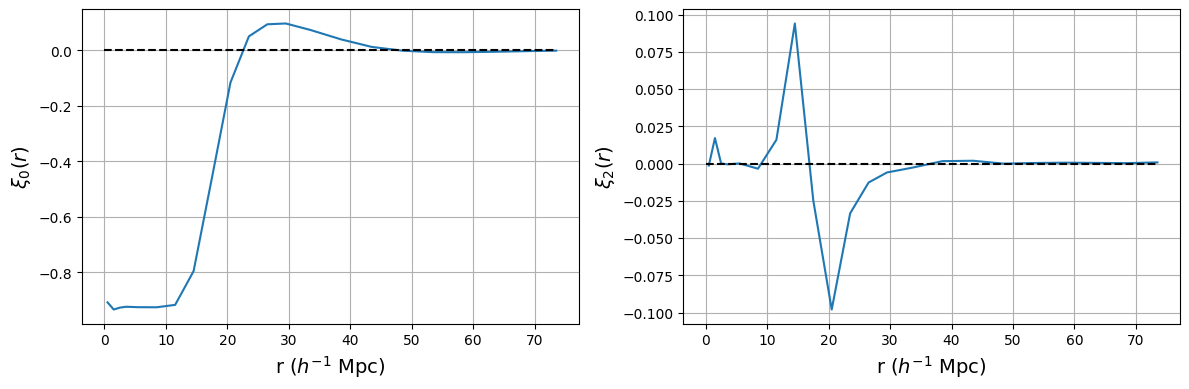

In [148]:
plot_ccf('output/tests/BigMD_box_nor_fixR_multipoles.fits', save_fn='ccf_test.png')

Pull to CFITSIO branch
References
Speak to Sesh.
Discuss results.

Volumes: 
- Box (no randoms) V=15737410560
- Box (50x randoms) V=15737410560
- Cutsky (50x randoms) V=2016946304

Run:
- Box no randoms
- Box 10x, 20x, 50x randoms
- Cutsky 50x randoms
- CCF box no randoms
- CCF box 50x randoms
- CCF cutsky 50x randoms
